# Heston Stochastic Volatility Model
------------------
> **Idriss Afra**

This project aims to implement the Heston model (1993) and use it to price Equity Variance and Volatility Swaps.

## Model Dynamics
The Heston model is defined by the following pair of SDEs under the Risk-Neutral measure :   

\begin{equation}
\begin{split}
dS_t & = (r_t - q_t) \times S_t \times dt + \sqrt(V_t) \times S_t \times dW^S_t \\
dV_t & = κ (θ - V_t) dt + σ \sqrt(V_t) dW^V_t \\
d<W^S, W^V>_t & = ρ × dt
\end{split}
\end{equation}

Where :    
- $S_t$ is the stock or index price
- $r_t$ is the deterministic instantaneous forward interest rate
- $q_t$ is the deterministic instantaneous forward dividend yield
- $V_t$ is the stochastic spot's variance
- $κ$ is the rate of reversion to the long-term price variance
- $θ$ is the long-term price variance
- $σ$ is the volatility of the stochastic volatility $\sqrt(V_t)$
- $\left(W^S, W^V\right)$ are $ρ$-correlated standard brownian motions

The Heston model incorporates a mean-reverting stochastic variance, offering a more realistic depiction of market dynamics compared to the Black-Scholes or Local Volatility models. As a result, it is particularly well-suited for pricing long-maturity and forward-start derivatives. However, the model's calibration can be complex due to the number of unknown parameters, which may lead to suboptimal fits to market option prices in certain cases.

## Vanilla Heston Price

### The Fourier Inversion Theorem
This theorem links the cumulative distribution function $F_X$ to the characteristic function $ϕ_X$ :

\begin{equation}
\begin{split}
F_X(x) & = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} \frac{e^{-iux} ϕ_X(u)}{iu} du\\
& = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu}\right) du \\
& = \frac{1}{2} - \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu} \right) du \\
\end{split}
\end{equation}

### The Characteristic Function
Let $X_t = log(S_t)$.

In this case : $dX_t = (r_t - q_t - \frac{V_t}{2})dt + \sqrt(V_t) dW^S_t$

Therefore, the characteristic function of $X_T$ at $t$ is :    

$$
ϕ_{X_T}(u, t) = f\left(iu, t, X_t, V_t\right) = E^{RN}\left(e^{iuX_T} | X_t, V_t\right)
$$

$\left(ϕ_{X_T}(., t)\right)_{t \le T}$ is a Martingale by definition under the Risk-Neutral measure.

Applying the Itô's lemma and making its drift equal to zero gives the following PDE under the Risk-Neutral measure:     

$$
f_t' + \left(r_t - q_t - \frac{V_t}{2}\right)f_x' + κ (θ - V_t)f_v' + \frac{V_t}{2}f_{xx}'' + \frac{\sigma^2 V_t}{2}f_{vv}'' + σ V_t ρ f_{xv}'' = 0
$$

Further, we know that the characteristic function $\left(ϕ_{X_T}(., t)\right)_{t \le T}$ has the following exponential affine form :

$$
ϕ_{X_T}(u, t) = f\left(iu, t, X_t, V_t\right) = e^{A(t, T) + B(t, T) X_t + C(t, T) V_t +iuX_t}
$$

With : $ϕ_{X_T}(u, T) = f\left(iu, T, x, v\right) = e^{iux}$

We inject this affine form in the above PDE and solve analytically the functions $A(t, T)$, $B(t, T)$, and $C(t, T)$ :

\begin{equation}
\begin{split}
A(\tau) & = \left(\bar{r}_{t,T} - \bar{q}_{t,T}\right) i u \tau + \frac{κθ}{σ^2} \left(-(ρσiu - κ - M)τ -2log\left(\frac{1-Ne^{Mτ}}{1-N}\right) \right) \\
B(τ) & = 0 \\
C(τ) & = \frac{(e^{Mτ} - 1)(ρσiu - κ - M)}{σ^2 (1-Ne^{Mτ})} \\
\text{Where :} \\
τ & = T - t \\
\bar{r}_{t,T} & = \frac{1}{τ} \int_t^T r_u du \\
\bar{q}_{t,T} & = \frac{1}{τ} \int_t^T q_u du \\
M & = \sqrt{(ρσiu - κ)^2 + σ^2 (iu + u^2)} \\
N & = \frac{ρσiu - κ - M}{ρσiu - κ + M} \\
\end{split}
\end{equation}

### The Vanilla Price Formula
The call vanilla option price is :

\begin{equation}
\begin{split}
C_t(T, K) & = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left( (S_T-K)^+ \right) \\
& = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) - K e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}\right)
\end{split}
\end{equation}

Where :
\begin{equation}
\begin{split}
E^{RN}\left(1_{S_T>K}\right) & = P^{RN}\left(S_T>K\right) \\
& = 1 - F_{X_T}\left(log(K)\right) \\
& = \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu) }{iu}\right) du \\
\end{split}
\end{equation}

On the other hand, by using the Radon-Nikodym theorem :

$$
e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) = S_t \times e^{-\bar{q}_{t,T} (T-t)} \times E^{S}\left(1_{S_T>K}\right) = S_t \times e^{-\bar{q}_{t,T} (T-t)} \times P^{S}\left(S_T>K\right)
$$

And :
\begin{equation}
\begin{split}
S_t \times e^{-\bar{q}_{t,T} (T-t)} \times E^{S}\left(1_{S_T>K}\right) & = S_t \times e^{-\bar{q}_{t,T} (T-t)} \times P^{S}\left(S_T>K\right) \\
&= S_t \times e^{-\bar{q}_{t,T} (T-t)} \times \left(1 - F^{S}_{X_T}(log(K))\right) \\
&= S_t \times e^{-\bar{q}_{t,T} (T-t)} \times \left(  \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f^{S}(iu)}{iu}\right)du \right)\\
& = \frac{S_t e^{-\bar{q}_{t,T} (T-t)}}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu+1)}{iu}\right) du \\
\end{split}
\end{equation}

Where :

\begin{equation}
\begin{split}
f^{S}(iu) & = E^{S}_{t}\left(e^{iuX_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t e^{-\bar{q}_{t,T} (T-t)}} \times E^{RN}_{t}\left( S_T e^{iuX_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t e^{-\bar{q}_{t,T} (T-t)}} E^{RN}_{t}\left(e^{(1+iu)X_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t e^{-\bar{q}_{t,T} (T-t)}} f(iu+1) \\
\end{split}
\end{equation}

Finally :

$$
C_t(T, K) = \frac{S_t e^{-\bar{q}_{t,T} (T-t)}}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu+1)}{iu}\right)du - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu)}{iu}\right) du  \right)
$$

We perform a change of variable $x = e^{-u}$ to get finite boundaries in the integrations :

$$
C_t(T, K) = \frac{S_t e^{-\bar{q}_{t,T} (T-t)}}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{1} Re\left(\frac{K^{ilog(x)} f(-ilog(x)+1)}{-ixlog(x)}\right)dx - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{1} Re\left(\frac{K^{ilog(x)} f(-ilog(x))}{-ixlog(x)}\right) dx  \right)
$$

Put vanilla option prices can then be computed using the call/put parity.

In [1]:
import math
import cmath
from scipy.integrate import quad

# Vanilla Option Price under the Heston model (1993)

def characteristic_func(params, x, r, T, X0, q=0) :
    """
    The characteristic function of ln(S(T)) under the Heston model.
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    corr = params["Correlation"]
    sigma = params["Volatility Of Volatility"]

    # Intermediate parameters :
    L = corr * sigma * x #1j * u
    M = cmath.sqrt((L - kappa)**2 + sigma**2 * (x + (x / 1j)**2))
    N = (L - kappa - M) / (L - kappa + M)
    M_T = M * T

    # Intermediate functions :
    A_T = (r - q) * x * T + (kappa * theta / sigma**2) * (-T * (L - kappa - M) - 2 * 
          cmath.log((1 - N * cmath.exp(M_T)) / (1 - N)))
    C_T = (cmath.exp(M_T) - 1) * (L - kappa - M) / ((1 - N * cmath.exp(M_T)) * sigma**2)

    # Analytical solution of the Heston characteristic function :
    return cmath.exp(A_T + C_T * v0 + x * X0)

def integral_1(params, r, T, S0, K, q=0) :
    """
    The first integration : We use the quad SciPy method based on the Fortran library QUADPACK.
    """
    func = lambda u : (K**(1j * math.log(u)) * characteristic_func(
                       params, -1j * math.log(u) + 1, r, T, math.log(S0), q) / (-1j * u * math.log(u))).real
    return quad(func, 0, 1)[0] 

def integral_2(params, r, T, S0, K, q=0) :
    """
    The second integration : We use the quad SciPy method based on the Fortran library QUADPACK.
    """
    func = lambda u : (K**(1j * math.log(u)) * characteristic_func(
                       params, -1j * math.log(u), r, T, math.log(S0), q) / (-1j * u * math.log(u))).real
    return quad(func, 0, 1)[0]

def heston_vanilla(params, S0, K, T, r, flavor, q=0) :
    """
    Vanilla price under the Heston model.
    The Put prices are deduced from the Call / Put parity.
    """
    call_price = 0.5 * S0 * math.exp(-q * T) + math.exp(-r * T) * integral_1(params, r, T, S0, K, q) / math.pi - \
                 K * math.exp(-r * T) * (0.5 + integral_2(params, r, T, S0, K, q) / math.pi)
    return call_price if flavor.upper()=="CALL" else call_price - S0 * math.exp(-q * T) + K * math.exp(-r * T)


Let's make the Heston prices match the Black-Scholes prices as a first validation test :

In [2]:
from scipy.stats import norm

def bs_price(flavor, K, T, S, r, vol, q=0) :
    """
    The Black-Scholes price.
    """
    v2T = vol**2 * T
    d1 = (math.log(S/K) + (r - q) * T + v2T / 2) / v2T**0.5
    d2 = d1 - v2T**0.5
    phi = 1 if flavor.upper() == "CALL" else  -1
    return phi * (S * math.exp(-q * T) * norm.cdf(phi * d1) - K * math.exp(-r * T) * norm.cdf(phi * d2))

# Degenerated Test
S0, K, T, r, q, sigma = 100, 90, 1, 0.015, 0.005, 0.2
print("The test case : Put option with Spot={}, K={}, T={}, r={}, q={}, and vol={}".format(S0, K, T, r, q, sigma))
print("To match Heston and Black models, we set the following parameter values : ")
params = {"Kappa" : 0, "Theta" : round(sigma**2, 2), "Initial Variance" : round(sigma**2, 2), 
          "Correlation" : 0, "Volatility Of Volatility" : 0.000001}
print(params)
print("-----------------------------------------------------------------------------------------------------------")
print("The Heston price : {:.6f}".format(heston_vanilla(params, S0, K, T, r, "Put", q)))
print("The Black price : {:.6f}".format(bs_price("Put", K, T, S0, r, sigma, q)))

The test case : Put option with Spot=100, K=90, T=1, r=0.015, q=0.005, and vol=0.2
To match Heston and Black models, we set the following parameter values : 
{'Kappa': 0, 'Theta': 0.04, 'Initial Variance': 0.04, 'Correlation': 0, 'Volatility Of Volatility': 1e-06}
-----------------------------------------------------------------------------------------------------------
The Heston price : 3.280959
The Black price : 3.280959


## Heston Calibration
In order to use the Heston model, we need to set its five different parameters : $κ$, $θ$, $V_0$, $ρ$, and $σ$.

These parameters are calibrated by minimizing the following error function :    

$$
(\kappa, θ, V_0, ρ, σ) = ArgMin \left(∑_{i = 1}^M w_i \times |Price_{i}^{Heston}(\kappa, θ, V_0, ρ, σ) - Price_{i}^{Market}| \right)
$$
In practice, the weights $(w_i)_{0 \le i \le M}$ are determined based on Bid/Ask spreads, with higher weights assigned to more liquid options (tight spreads).

For this project, we assign equal weights to all market options and employ the [Differential Evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html) optimization method from SciPy. This method is designed to find the global minimum of a multivariate function, without requiring initial guesses, and can accommodate non-linear constraints. To minimize execution time, we break the optimization process once eight potential solutions are found or when the error drops below 0.01%. Additionally, we set a maximum iteration limit of 250 and omit the polishing step for the same reason.

In [3]:
from scipy.optimize import differential_evolution, NonlinearConstraint

# We ignore the differential_evolution warnings for display purposes
import warnings
warnings.filterwarnings("ignore")

def heston_calibration(S0, zc_rate, T, strikes, flavors, weights, prices, q=0) :
    """
    Heston calibration algorithm : Kappa is given in input, Corr and Vol of Vol are estimated via historical analysis.
    """
    # Params : V0, Theta, Kappa, VolOfVol, Rho
    bounds = ((0.0001, 1), (0.25, 1.5), (0.005, 3), (0.0001, 1), (-0.8, 0.))

    # The constraint 2 * Kappa * Theta > VolOfVol**2 is needed to make sure that the 
    # stochastic variance is strictly positive
    def constraint(params) :
        return 2 * params[2] * params[1] - params[3]**2 - 1e-10
    nlc = NonlinearConstraint(constraint, 1e-10, np.inf)
    
    # Prints up to five Local Minimas (Potential results) and callback the algorithm afterward
    def debugger(xk, convergence):
        error = obj_func(xk, S0, zc_rate, T, strikes, flavors, weights, prices, q)
        debugger.counter += 1
        print("Error at local minimum point number {} : {}".format(debugger.counter, round(error, 6)))
        if error < 1e-4 or debugger.counter == 8:
            return True
        return False
    debugger.counter = 0
    
    res = differential_evolution(obj_func, args=(S0, zc_rate, T, strikes, flavors, weights, prices, q),
                                bounds=bounds,
                                constraints=(nlc),
                                callback=debugger,
                                maxiter=250,
                                seed = 0,
                                polish = False)
    return res.x

def obj_func(parameters, S0, zc_rate, T, strikes, flavors, weights, prices, q=0) :
    """
    The objective function of the Heston calibration process.
    """
    nb_instrs = 0
    sse = 0
    params = {"Initial Variance" : parameters[0], "Theta" : parameters[1], "Kappa" : parameters[2],  
              "Volatility Of Volatility" : parameters[3], "Correlation" : parameters[4]}
    for j in range(len(strikes)) :
        sse += weights[j] * abs(prices[j] - heston_vanilla(params, S0, strikes[j], T, zc_rate, flavors[j], q))
    return sse


## Application : CAC40 Listed Index Options

Now, let's celibrate the Heston model on the CAC40 market options. To achieve this, we use the CAC40 implied forwards and volatilities as of February 12, 2025, computed in the following project : [Equity Implied Volatility Surface](https://github.com/Idriss-Afra/Equity-Implied-Volatility-Surface/blob/main/Equity%20Implied%20Volatility%20Surface.ipynb).

Since the expiry of traded Variance and Volatility Swaps is typically less than one year, we will focus on the listed expiry of 10 months :

In [4]:
import datetime
import numpy as np

as_of_date = datetime.date(2025, 2, 12)

# Spot Price
S0 = 8042.19

# Listed expiry
# /!\ FYI : If the expiry is not listed, calibration should be done on the adjacent listed 
# expiries, with final Heston parameters interpolated from their results.
exp_date = datetime.date(2025, 12, 19)
T = (exp_date - as_of_date).days / 365

# Interpolated ZC Rate based on the EURIBOR-6M
zc_rate = 2.361452 / 100

# Implied Data
fwd = 8003.0031
zc_div = zc_rate - np.log(fwd / S0) / T
market_strikes = np.array([7800.0, 7850.0, 7900.0, 7950.0, 8000.0, 8050.0, 8100.0, 8150.0, 8200.0, 8300.0, 8400.0])
market_flavors = np.array([("Call" if K > fwd else "Put") for K in market_strikes])
market_prices = np.array([363.16, 380.34, 399.09, 418.95, 439.89, 415.51, 389.91, 364.6, 340.38, 294.89, 253.61])
implied_vols = np.array([0.1602, 0.1582, 0.1564, 0.1548, 0.1532, 0.1516, 0.1503, 0.1488, 0.1474, 0.1447, 0.1422])


Choosing the appropriate calibration basket is crucial, as it directly impacts both the efficiency and duration of the calibration process. Priority should be given to OTM put options, considering the downside risk in the equity market, while avoiding extreme strikes and staying close to the ATM to ensure the stability of the calibration.

In [5]:
# 1 - Data Cleaning & Filtering  :
def exercise_probability(exp, forward, strike, vol):
    """
    Computes the Black exercise probability.
    """
    phi = 1 if (strike > forward) else -1 # OTM Calls / Puts
    sqrt_v2T = np.sqrt(vol**2 * exp)
    d2 = np.log(forward / strike) / sqrt_v2T - 0.5 * sqrt_v2T
    return norm.cdf(phi * d2)
    
def clean_data(exp, forward, strikes, vols, min_moneyness = 0.95, max_moneyness = 1.03, min_exercise_proba=0.05, 
               max_exercise_proba=0.95):
    """
    Cleans the data before Heston calibration to ensure its efficiency and redue its duration.
    The filters are based on moneyness and execise probabilities.
    Priority should be given to OTM put options, considering the downside risk in the equity market, 
    while avoiding extreme strikes and staying close to the ATM to ensure the stability of the calibration.
    """
    keep_index = [i for i in range(len(strikes)) if 
                 (strikes[i] / forward >= min_moneyness) and (strikes[i] / forward <= max_moneyness) and
                 exercise_probability(exp, forward, strikes[i], vols[i]) >= min_exercise_proba and 
                 exercise_probability(exp, forward, strikes[i], vols[i]) <= max_exercise_proba]
    nb_cleaned_data = len(strikes) - len(keep_index)
    word = " was " if nb_cleaned_data == 1 else "s were "
    if nb_cleaned_data > 0 : print("/!\ Warning : " + str(nb_cleaned_data) + " strike" + word + "filtered.")
    return keep_index

filtered_index = clean_data(T, fwd, market_strikes, implied_vols)

# 2 - Data Sampling :
step = 1 # => Sampling Frequency
n_max = 6 # => Maximum size of the Calib Basket
filtered_index = [i for i in filtered_index if i % step == 0]
filtered_index = filtered_index[:n_max] # => Priority given to OTM Puts
filtered_strikes = np.array([market_strikes[i] for i in filtered_index])
filtered_flavors = np.array([market_flavors[i] for i in filtered_index])
filtered_prices = np.array([market_prices[i] for i in filtered_index])
filtered_vols = np.array([implied_vols[i] for i in filtered_index])
weights = np.array([1] * len(filtered_strikes))
weights = weights / np.sum(weights)

/!\ Warning : 2 strikes were filtered.


In [6]:
import timeit

print("Heston Calibration : ")
print("-----------------------------------------------------")
start = timeit.default_timer()
parameters = heston_calibration(S0, zc_rate, T, filtered_strikes, filtered_flavors, weights, filtered_prices, zc_div)
stop = timeit.default_timer()
print("-----------------------------------------------------")
print("End of calibration after : {:.2f}s".format(stop - start))
print("-----------------------------------------------------")
print("Calibration Results :")
params = {"Initial Variance" : parameters[0], "Theta" : parameters[1], "Kappa" : parameters[2],  
          "Volatility Of Volatility" : parameters[3], "Correlation" : parameters[4]}
for key in params.keys():
    print("Calibrated {} : {:.2f}%".format(key, 100 * params[key]))

Heston Calibration : 
-----------------------------------------------------
Error at local minimum point number 1 : 163.251718
Error at local minimum point number 2 : 163.251718
Error at local minimum point number 3 : 163.251718
Error at local minimum point number 4 : 57.626101
Error at local minimum point number 5 : 57.626101
Error at local minimum point number 6 : 57.626101
Error at local minimum point number 7 : 4.698988
Error at local minimum point number 8 : 4.698988
-----------------------------------------------------
End of calibration after : 79.68s
-----------------------------------------------------
Calibration Results :
Calibrated Initial Variance : 0.51%
Calibrated Theta : 37.76%
Calibrated Kappa : 14.84%
Calibrated Volatility Of Volatility : 31.71%
Calibrated Correlation : -25.67%


Market Prices vs Heston Calibrated Prices :
---------------------------------------------
Flavor :  Put
Strike :  7800.0
Market Price :  363.16
Heston Price :  355.76
Calibration Error : 2.04%
---------------------------------------------
Flavor :  Put
Strike :  7850.0
Market Price :  380.34
Heston Price :  376.77
Calibration Error : 0.94%
---------------------------------------------
Flavor :  Put
Strike :  7900.0
Market Price :  399.09
Heston Price :  398.71
Calibration Error : 0.09%
---------------------------------------------
Flavor :  Put
Strike :  7950.0
Market Price :  418.95
Heston Price :  421.6
Calibration Error : 0.63%
---------------------------------------------
Flavor :  Put
Strike :  8000.0
Market Price :  439.89
Heston Price :  445.43
Calibration Error : 1.26%
---------------------------------------------
Flavor :  Call
Strike :  8050.0
Market Price :  415.51
Heston Price :  424.17
Calibration Error : 2.08%
---------------------------------------------


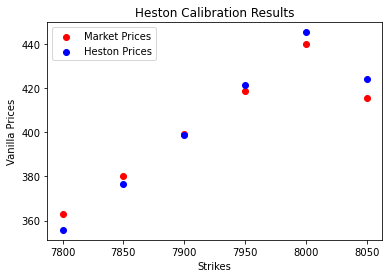

In [7]:
import matplotlib.pyplot as plt

print("Market Prices vs Heston Calibrated Prices :")
print("---------------------------------------------")

heston_prices = []
for j in range(len(filtered_strikes)) :
    heston_price = heston_vanilla(params, S0, filtered_strikes[j], T, zc_rate, filtered_flavors[j], zc_div)
    heston_prices.append(heston_price)
    market_price = filtered_prices[j]
    print("Flavor : ", filtered_flavors[j])
    print("Strike : ", filtered_strikes[j])
    print("Market Price : ", round(market_price, 2))
    print("Heston Price : ", round(heston_price, 2))
    print("Calibration Error : {:.2f}%".format(100 * abs(heston_price / market_price -1)))
    print("---------------------------------------------")

plt.title("Heston Calibration Results")
plt.ylabel("Vanilla Prices")
plt.xlabel("Strikes")
plt.scatter(filtered_strikes, filtered_prices, color="red", label="Market Prices")
plt.scatter(filtered_strikes, heston_prices, color="blue", label="Heston Prices")
plt.legend(loc="upper left")
plt.show()

## Variance Swap : Fair Variance Strike

The Fair Variance Strike $K_{Var}$ is defined by : $\frac{1}{T}∫_0^TE(V_t)dt$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

### The Heston Model

The Fair Variance is computed  analytically under the Heston model. In fact, since :

$$
V_T = V_0 + ∫_0^Tκ(θ - V_t)dt+∫_0^Tσ\sqrt(V_t) dW^V_t
$$

Then :
$$
E(V_T) = V_0 + κθT - κ∫_0^T E(V_t)dt
$$

Which implies the following ODE :           
$$
\frac{dE(V_T)}{dT} = κθ - κE(V_T)
$$

Its solution is :    
$$
E(V_T) = θ + (V_0 - θ) e^{-κT}
$$

Hence :
$$
K_{Var} = \frac{1}{T} ∫_0^T E(V_T) = \frac{1 - e^{-κT}}{κT} V_0 + \left(1 - \frac{1 - e^{-κT}}{κT}\right) θ
$$

In [8]:
def fair_var_strike_heston(params):
    """
    The Heston Fair Var Strike.
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    sigma = params["Volatility Of Volatility"]

    # Intermediate parameters :
    K_T = kappa * T
    exp_K_T = (1 - math.exp(- K_T)) / K_T

    return v0 * exp_K_T + theta * (1 - exp_K_T)

fair_var_heston = fair_var_strike_heston(params)
print("The Fair Variance Strike (Heston) up to {} is : {:.2f}%".format(exp_date, 100 * fair_var_heston))

The Fair Variance Strike (Heston) up to 2025-12-19 is : 2.77%


### The Market Model (Replication Method)

In practice, Variance Swaps are priced by a replication method. In fact, practitioners value Fair Variance Strikes through replication by OTM call and put vanilla options.

Since : $dlog(S_t) = \left( r_t - q_t - \frac{V_t}{2} \right)dt + \sqrt{V_t}dW_t = \frac{dS_t}{S_t} - \frac{V_t}{2} dt$

Then : $\frac{1}{2}∫_0^T V_t dt = ∫_0^T \frac{dS_t}{S_t} - log\left(\frac{S_T}{S_0}\right)$

Consequently :

\begin{equation}
\begin{split}
\frac{1}{2}∫_0^T E(V_t) dt & = ∫_0^T E\left(\frac{dS_t}{S_t}\right) - E\left(log\left(\frac{S_T}{S_0}\right)\right) \\
&= ∫_0^T (r_t - q_t) dt - E\left(log\left(\frac{S_T}{S_0}\right)\right) \\
&= - E\left(log\left(\frac{S_T}{F_{0,T}}\right)\right) \\
\end{split}
\end{equation}

Where : $F_{0,T} = S_0 \times e^\left({∫_0^T (r_t - q_t) dt}\right)$ is the forward price up to $T$

Finally, the well-known Carr-Madan replication method gives the following result :

$$
K_{Var} = \frac{2}{T} \times \left( ∫_0^{F_{0,T}} \frac{1}{K^2} Put_{Vanilla}(K)dK + ∫_{F_{0,T}}^{+∞} \frac{1}{K^2} Call_{Vanilla}(K)dK \right)
$$


In [9]:
# Price Validation : Pricing by Replication with OTM Calls & Puts

from scipy.interpolate import interp1d

# 1 - Market Implied Skew : Cubic Spline Interpolation & Flat Extrapolation
def skew(k):
    if k >= market_strikes[0] and k <= market_strikes[-1] :
        return interp1d(market_strikes, implied_vols, kind='cubic', fill_value="extrapolate")(k)
    else :
        return (implied_vols[0] if (k < market_strikes[0]) else implied_vols[-1])

# 2 - Fair Variance Strike by Replication
def fair_var_strike_replication(n_stdev=5):
    """
    The Fair Var Strike by Replication.
    """
    otm_put = lambda k : bs_price("Put", k, T, S0, zc_rate, skew(k), zc_div) / k**2
    otm_call = lambda k : bs_price("Call", k, T, S0, zc_rate, skew(k), zc_div) / k**2
    
    # Fix an upper bound to replace +inf 
    # /!\ The OTM call component would disappear if wa apply the change of variable, as : exp(-fwd) = 0.
    upper_bound = fwd * np.exp(n_stdev * skew(fwd) * np.sqrt(T))
    
    return (2 / T) * (quad(otm_put, 0, fwd)[0] + quad(otm_call, fwd, upper_bound)[0])

fair_var_replication = fair_var_strike_replication()
print("The Fair Variance Strike (Replication) up to {} is : {:.2f}%".format(exp_date, 100*fair_var_replication))
print("=> The Difference between Heston & Replicated Fair Variance Strikes is : {:.2f}%".format(
       100*abs(fair_var_replication-fair_var_heston)))

The Fair Variance Strike (Replication) up to 2025-12-19 is : 2.28%
=> The Difference between Heston & Replicated Fair Variance Strikes is : 0.49%


## Volatility Swap : Fair Volatility Strike
The Fair Volatility Strike $K_{Vol}$ is defined by : $∫_0^TE\left(\sqrt{\frac{1}{T}V_t dt}\right)$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

### Volatility Convexity Adjustment
Since the square root function is concave, the Jensen inequality gives the following result :    

$$
K_{Vol} = ∫_0^TE\left(\sqrt{\frac{1}{T}V_t dt}\right) \le \sqrt{K_{Var}} = \sqrt{ \frac{1}{T}∫_0^TE(V_t)dt }
$$

Therefore, $∃VolConvAdj \le 0$ such as :    
$$
K_{Vol} = \sqrt{K_{Var}} + VolConvAdj
$$

### The Heston Model

A semi-analytical price of Volatility Swaps is possible under the Heston model thanks to the following equality :

$$
\sqrt{v} = \frac{1}{2 \sqrt{\pi}} ∫_{0}^{+∞} \frac{1 - e^{-xv}}{x^{1.5}}dx
$$

In fact :

$$
K_{Vol} = \frac{1}{2 \sqrt{\pi T}} ∫_{0}^{+∞} \frac{1 - E\left(e^{-x ∫_0^T V_t dt}\right)}{x^{1.5}}dx
$$

Defining $r_t = x V_t$, we have :

\begin{equation}
\begin{split}
dr_t & = xdV_t \\
&= κ (xθ - r_t) dt + \sqrt{x} σ \sqrt{r_t} dW^V_t \\
&= κ (θ' - r_t) dt + σ' \sqrt{r_t} dW^V_t \\
\end{split}
\end{equation}

Where : $θ'=xθ$ and $σ'=\sqrt{x} σ$

Therefore, $(r_t)_{t \ge 0}$ follows the Cox-Ingersoll-Ross (CIR) model (similar to $(V_t)_{t \ge 0}$)

As such, the expectection $E\left(e^{-x ∫_0^T V_t dt}\right)$ is nothing but the zero-coupon price under the CIR model. For $x \ge 0$ :

$$
E\left(e^{-x ∫_0^T V_t dt}\right) = E\left(e^{-∫_0^T r_t dt}\right) = e^{A - B \times r_0} = e^{A - B x V_0}
$$

Where :

\begin{equation}
\begin{split}
g(x) & = \sqrt{\kappa^2 + 2x σ^2} \\
B(x) & = \frac{2 \left( 1 - e^{-g(x)T} \right)}{\left(g(x)+\kappa\right)\left(1-e^{-g(x)T}\right)+2g(x)e^{-g(x)T}} \\
A(x) & = \frac{\kappa\theta}{\sigma^2} \times \left( \left(\kappa + g(x)\right)T - 2 log\left( 1 + \frac{\left( g(x) + \kappa \right) \left( e^{g(x)T} - 1 \right)}{2g(x)} \right) \right)
\end{split}
\end{equation}

In summary, the annulized expected volatility is given by the integration :

$$
K_{Vol} = \frac{1}{2\sqrt{\pi T}} ∫_{0}^{+∞}\frac{1 - e^{A(x)-B(x)xV_0}}{x^{1.5}}dx
$$

We perform a change of variable $x' = e^{-x}$ to get finite boundaries in the integration :

$$
K_{Vol} = \frac{1}{2\sqrt{\pi T}} ∫_{0}^{1}\frac{1 - e^{A(-log(x'))+B(-log(x'))log(x')V_0}}{x'(-log(x'))^{1.5}}dx'
$$

In [10]:
def fair_vol_strike_heston(params):
    """
    The Heston Fair Vol Strike.
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    sigma = params["Volatility Of Volatility"]

    # Intermediate functions :
    g = lambda x : np.sqrt(kappa**2 + 2 * x * sigma**2)
    B = lambda x : 2 * (1 - np.exp(-g(x) * T)) / ((g(x) + kappa) * (1 - np.exp(-g(x) * T)) + 2 * g(x) * np.exp(-g(x) * T))
    A = lambda x : (kappa * theta / sigma**2) * (
                   (kappa + g(x)) * T - 2 * np.log(1 + (g(x) + kappa) * (np.exp(g(x) * T) - 1) / (2 * g(x))))

    # Main function :
    f = lambda x : (1 - np.exp(A(-np.log(x)) + B(-np.log(x)) * np.log(x) * v0)) / (x * (-np.log(x))**1.5)
    
    return quad(f, 0, 1)[0] / (2 * np.sqrt(math.pi * T))

fair_vol_heston = fair_vol_strike_heston(params)
print("The Fair Volatility Strike (Heston) up to {} is : {:.2f}%".format(exp_date, 100 * fair_vol_heston))
print("The Square-Root of the Fair Variance Strike (Heston) up to {} is : {:.2f}%".format(
       exp_date, 100 * math.sqrt(fair_var_heston)))
print("=> The Convexity Adjustment up to {} is : {:.2f}%".format(
       exp_date, 100 * (fair_vol_heston - math.sqrt(fair_var_heston))))

The Fair Volatility Strike (Heston) up to 2025-12-19 is : 10.53%
The Square-Root of the Fair Variance Strike (Heston) up to 2025-12-19 is : 16.63%
=> The Convexity Adjustment up to 2025-12-19 is : -6.10%
